In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import ar_select_order
pd.options.mode.chained_assignment = None 
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, r2_score
from seven import *
from math import *
import csv

plt.rcParams['figure.figsize'] = (14,6)

In [2]:
clean('TG_STAID002759.txt', 'data7.csv')

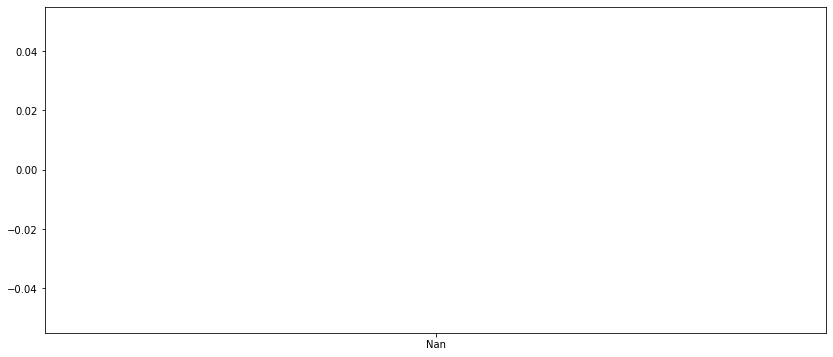

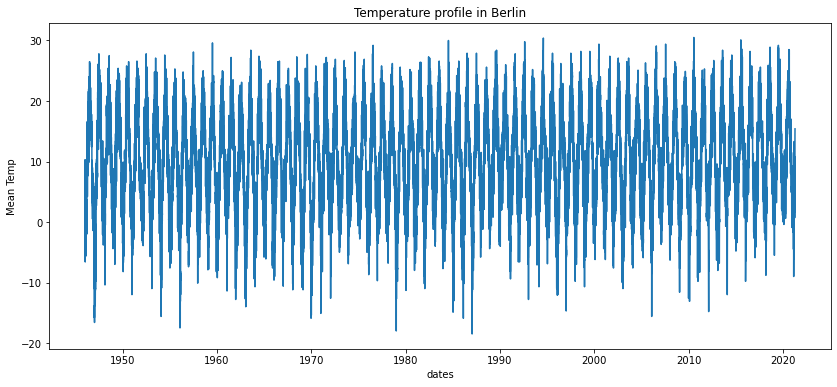

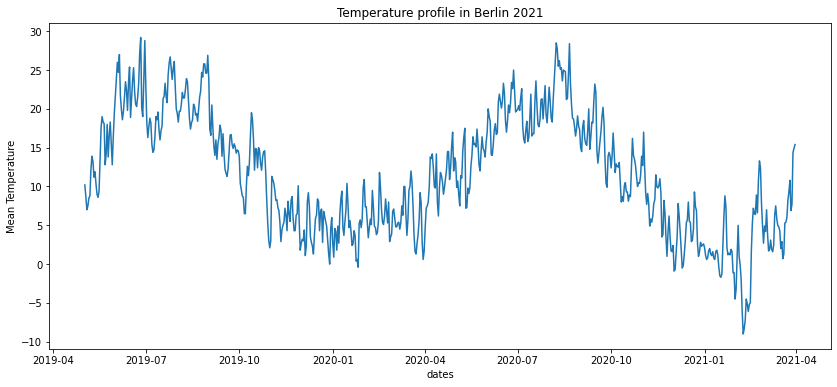

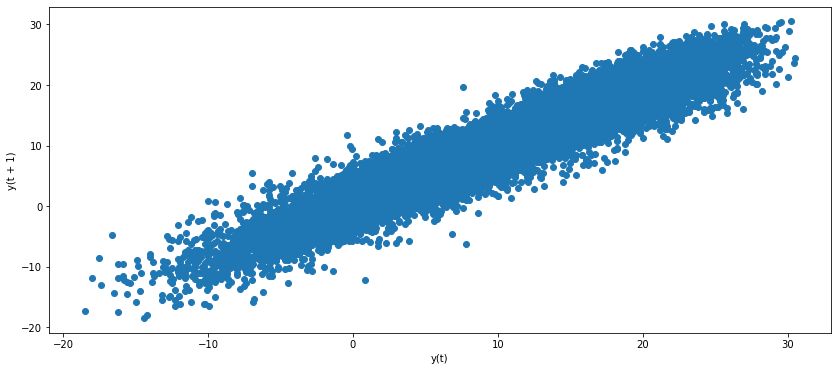

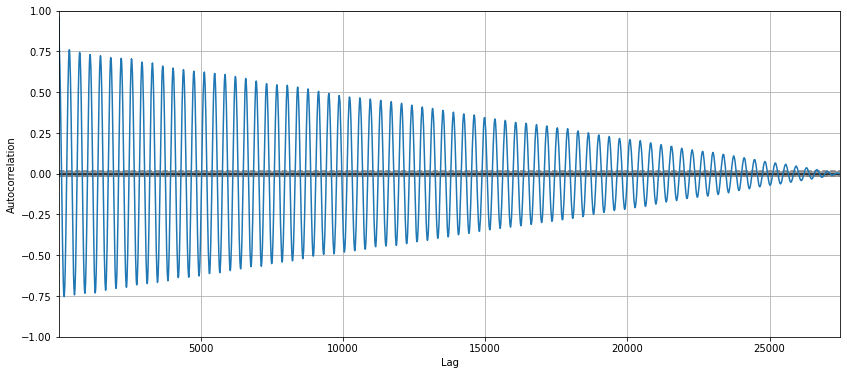

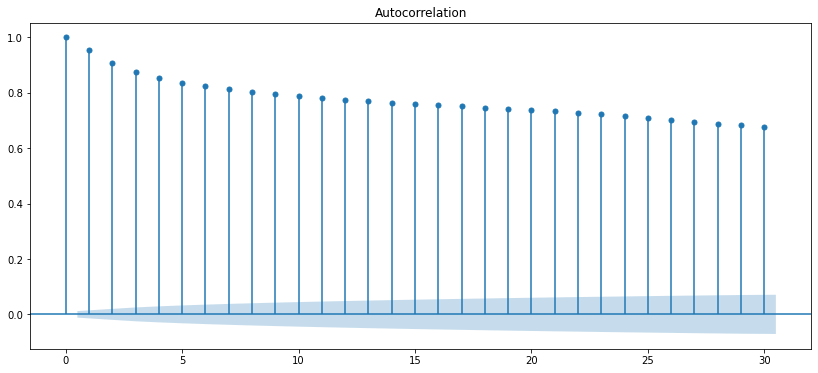

In [3]:
plot('data7.csv')

In [4]:
train,test,Xtrain,ytrain,Xtest,ytest = split_data('data7.csv')

Trend: [0.051397] °C
intercept: 9.018609843825438


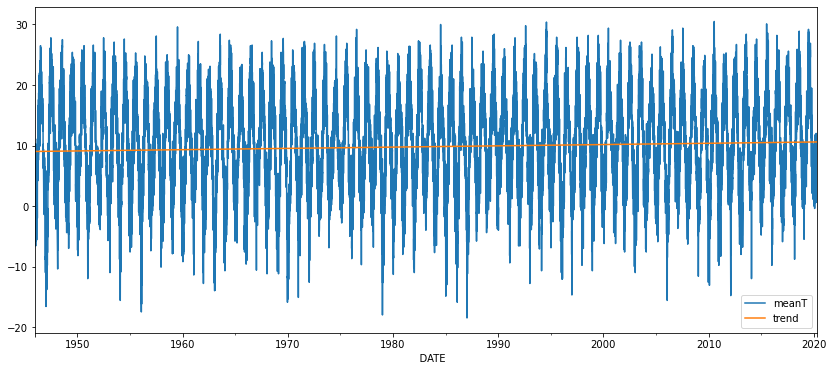

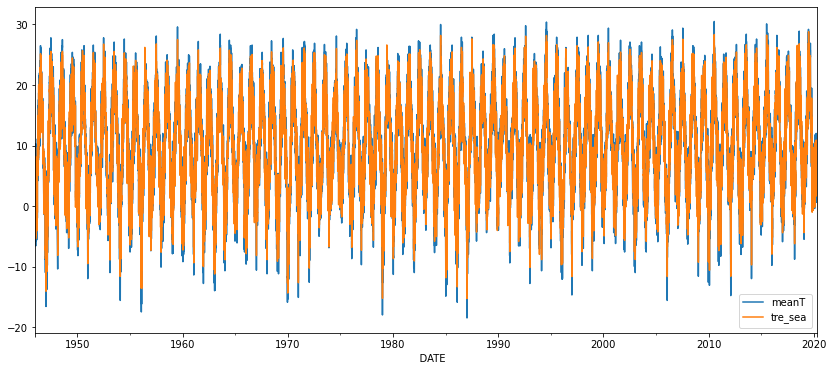

In [15]:
train = trend_seas(train)                               #baseline

/home/daniel/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/daniel/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


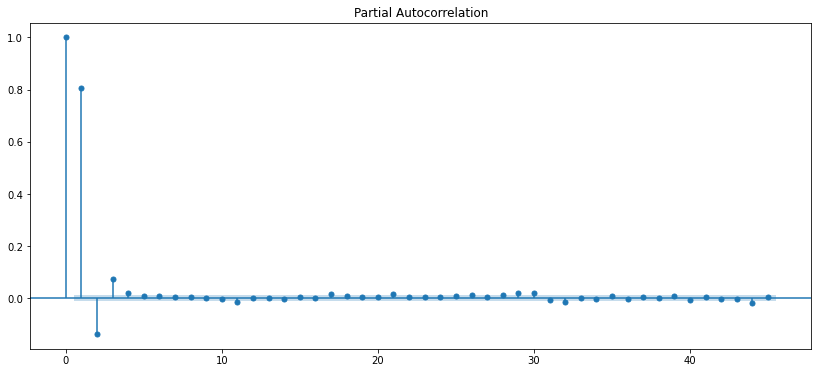

In [16]:
train_re, lags = rem_lags('remainder.csv')

In [17]:
train['lag1'] = train_re['remainder'].shift(1)
train['lag2'] = train_re['remainder'].shift(2)
train['lag3'] = train_re['remainder'].shift(3)

/home/daniel/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
No handles with labels found to put in legend.


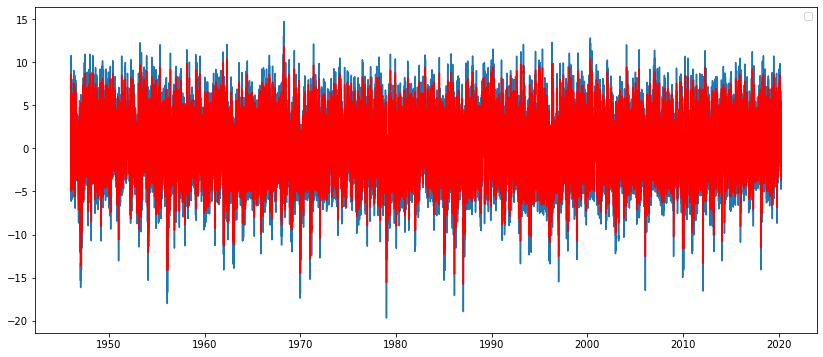

In [21]:
#train autoregression
arm = AutoReg(endog=train_re, lags=3, old_names=False).fit()
predictions = arm.predict()
plt.plot(train_re)
plt.plot(predictions, color='red')
plt.legend()
plt.show()

In [22]:
arm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              remainder   No. Observations:                27119
Model:                     AutoReg(3)   Log Likelihood              -61246.256
Method:               Conditional MLE   S.D. of innovations              2.316
Date:                Mon, 03 May 2021   AIC                              1.680
Time:                        15:35:35   BIC                              1.681
Sample:                    01-04-1946   HQIC                             1.680
                         - 03-31-2020                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          3.23e-05      0.014      0.002      0.998      -0.028       0.028
remainder.L1     0.9255      0.006    152.829      0.000       0.914       0.937
remainder.L2    -0.2049      0.008    -25.080      0.000      -0.221      -0.189
remainder.L3     0.0746      0.006     12.326      0.000       0.063       0.087
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2727           -0.0000j            1.2727           -0.0000
AR.2            0.7358           -3.1598j            3.2443           -0.2136
AR.3            0.7358           +3.1598j            3.2443            0.2136
-----------------------------------------------------------------------------
"""

/home/daniel/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/daniel/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/daniel/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


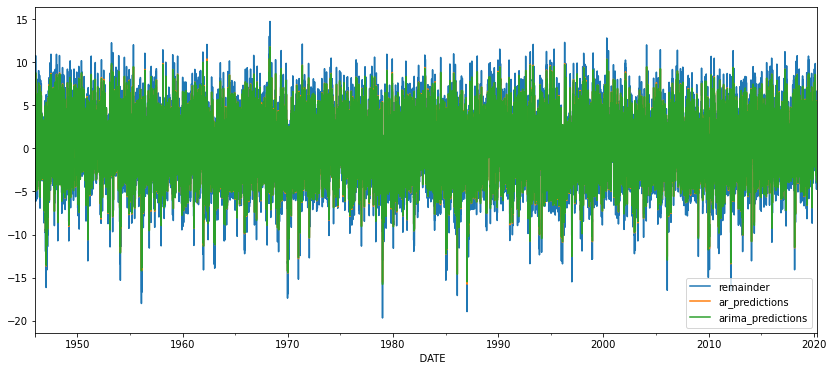

In [20]:
arima = ARIMA(train_re, order=(1,0,1)).fit()
# Plot all time series
train_re.plot()
plt.plot(arm.predict(), label='ar_predictions')
plt.plot(arima.predict(), label='arima_predictions')
plt.legend()
plt.show()

In [13]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              remainder   No. Observations:                27119
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -61286.821
Date:                Mon, 03 May 2021   AIC                         122581.642
Time:                        15:33:54   BIC                         122614.474
Sample:                    01-01-1946   HQIC                        122592.227
                         - 03-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.065     -0.002      0.999      -0.127       0.127
ar.L1          0.7387      0.005    158.542      0.000       0.730       0.748
ma.L1          0.1924      0.007     28.047      0.000       0.179       0.206
sigma2         5.3760      0.041    132.456      0.000       5.296       5.456
===================================================================================
Ljung-Box (L1) (Q):                   0.74   Jarque-Bera (JB):               602.04
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
train = train[4:]
X_full = train.drop(columns=['meanT', 'tre_sea', 'remainder'])
y_full = train['meanT']

KeyError: "['tre_sea' 'remainder'] not found in axis"

In [ ]:
m_full = LinearRegression().fit(X_full, y_full)
train['predictions_full_model'] = m_full.predict(X_full)
plot_meanT(train[['meanT', 'tre_sea', 'predictions_full_model']])

In [ ]:
ts_split = TimeSeriesSplit(n_splits=5)
ts_split.split(X_full, y_full)

In [ ]:
for i, (train_index, validation_index) in enumerate(ts_split.split(X_full, y_full)):
    print(f'The training data for the {i+1}th iteration are the observations {train_index}')
    print(f'The validation data for the {i+1}th iteration are the observations {validation_index}')
    print()

In [ ]:
# Create the time series split
time_series_split = ts_split.split(X_full, y_full) 

In [ ]:
# Do the cross validation
result = cross_val_score(estimator=m_full, X=X_full, y=y_full, cv=time_series_split)
result
result.mean()

In [ ]:
result_ordinary_cv = cross_val_score(estimator=m_full, X=X_full, y=y_full, cv=5)
result_ordinary_cv
result_ordinary_cv.mean()

In [ ]:
#paraphased from stackoverflow1!! - link to follow
def adj_r2(df, r2_score, y_test, y_pred):
    adj_r2 = (1 - (1 - r2_score(y_test,y_pred)) * ((df.shape[0] - 1) / 
          (df.shape[0] - df.shape[1] - 1)))
    return adj_r2

In [ ]:
mses = []
maes = []
rmse = []
mape = []
rmsle = []
r2 = []
ar2 = []
for i, (train_index, validation_index) in enumerate(ts_split.split(X_full, y_full)):
    model = LinearRegression()
    model.fit(X_full.iloc[train_index], y_full.iloc[train_index])
    ypred = model.predict(X_full.iloc[validation_index])
    mses.append(mean_squared_error(y_full.iloc[validation_index], ypred))
    maes.append(mean_absolute_error(y_full.iloc[validation_index], ypred))
    rmse.append(np.sqrt(mean_squared_error(y_full.iloc[validation_index], ypred)))
    mape.append(sum(abs((y_full.iloc[validation_index] - ypred) / y_full.iloc[validation_index])) * 100 / len(y_full.iloc[validation_index]))
    rmsle.append(np.sqrt(mean_squared_log_error(y_full.iloc[validation_index], ypred)))
    r2.append(r2_score(y_full.iloc[validation_index], ypred))
    ar2.append(adj_r2(X_full,r2_score,y_full.iloc[validation_index], ypred))

In [ ]:
index = [f'{x}%' for x in range(20,120,20)]

In [ ]:
evaluations = pd.DataFrame(dict(mse=mses, mae=maes, rmse=rmse, mape=mape, rmsle=rmsle, r2=r2, adj_r2=ar2), index=index)
evaluations